In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Testing Tensor class

In [46]:
import numpy as np
import matplotlib.pyplot as plt

import autodiff.dl.elemental_functions as F

from autodiff.dl.tensor import Tensor

In [4]:
x = Tensor([1, 2, 3])

In [5]:
print(x)

array([1, 2, 3])


In [6]:
y = Tensor([9, 8 , 7])

# arithmetic

In [7]:
x + y

array([10, 10, 10])

In [8]:
x - y

array([-8, -6, -4])

In [11]:
z = Tensor(2)

# reverse mode AD

In [13]:
x1 = Tensor(2)
x2 = Tensor(5)

x1, x2

(array(2), array(5))

In [14]:
y = F.subtract(F.add(F.log(x1), F.multiply(x1, x2)), F.sin(x2))
y

array(11.65207146)

In [15]:
y.backward()

In [16]:
x1.gradient, x2.gradient

(5.5, 1.7163378145367738)

## power

The derivate of $x^2$ should be $2x$

In [54]:
x1 = Tensor([0 ,1 ,2, 3, 4, 5])

In [55]:
y = F.pow(x1, n=2)
y.backward()

y

array([ 0,  1,  4,  9, 16, 25])

In [56]:
x1.gradient

array([ 0,  2,  4,  6,  8, 10])

Text(0.5, 1.0, 'derivative')

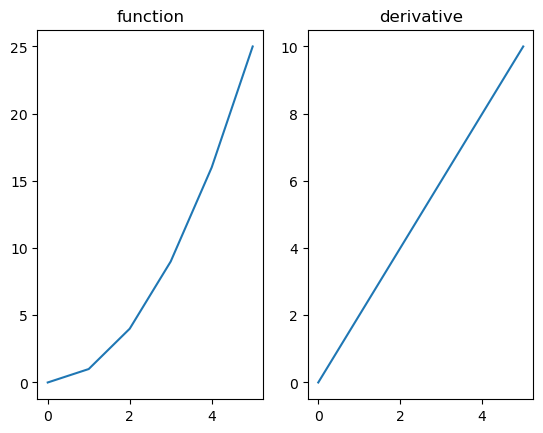

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x1.value, y.value)
ax2.plot(x1.value, x1.gradient)

ax1.set_title('function')
ax2.set_title('derivative')

## sine

The derivative of $\sin(x)$ should be $\cos(x)$

In [58]:
x1 = Tensor(np.pi * np.linspace(-2, 2))

In [59]:
y = F.sin(x1)
y.backward()

array([ 2.44929360e-16,  2.53654584e-01,  4.90717552e-01,  6.95682551e-01,
        8.55142763e-01,  9.58667853e-01,  9.99486216e-01,  9.74927912e-01,
        8.86599306e-01,  7.40277997e-01,  5.45534901e-01,  3.15108218e-01,
        6.40702200e-02, -1.91158629e-01, -4.33883739e-01, -6.48228395e-01,
       -8.20172255e-01, -9.38468422e-01, -9.95379113e-01, -9.87181783e-01,
       -9.14412623e-01, -7.81831482e-01, -5.98110530e-01, -3.75267005e-01,
       -1.27877162e-01,  1.27877162e-01,  3.75267005e-01,  5.98110530e-01,
        7.81831482e-01,  9.14412623e-01,  9.87181783e-01,  9.95379113e-01,
        9.38468422e-01,  8.20172255e-01,  6.48228395e-01,  4.33883739e-01,
        1.91158629e-01, -6.40702200e-02, -3.15108218e-01, -5.45534901e-01,
       -7.40277997e-01, -8.86599306e-01, -9.74927912e-01, -9.99486216e-01,
       -9.58667853e-01, -8.55142763e-01, -6.95682551e-01, -4.90717552e-01,
       -2.53654584e-01, -2.44929360e-16])

Text(0.5, 1.0, 'derivative')

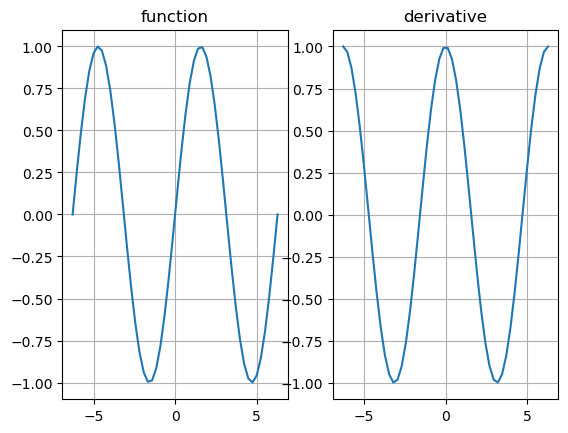

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(x1.value, y.value)
ax2.plot(x1.value, x1.gradient)

ax1.grid()
ax2.grid()

ax1.set_title('function')
ax2.set_title('derivative')